In [ ]:
import tensorflow as tf
from keras import layers
from tensorflow import keras
from keras.layers import Normalization,Rescaling,RandomFlip,RandomRotation,RandomZoom
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout,MaxPooling2D,Conv2D
from keras import datasets
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
data_dir='/content/drive/MyDrive/My_friends_dataset'


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
		    height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255,
        validation_split=0.2)
train_generator = datagen.flow_from_directory(
    data_dir, 
    subset='training',
    target_size=(img_height,img_width),
    batch_size=batch_size,

)

val_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2).flow_from_directory(
    data_dir,
    subset='validation',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    
)

Found 117 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


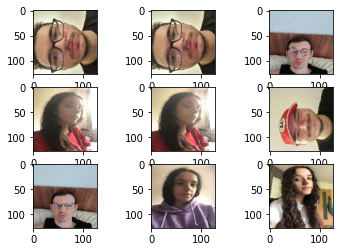

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = val_generator.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image[i])
# show the figure
plt.show()

In [ ]:

resnet50=tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height,img_width,3),
 
)

model=Sequential()
model.add(resnet50)
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3,activation="softmax"))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.89 and logs.get('loss') <= 0.89 and logs.get('val_loss') <= 0.89:
            self.model.stop_training = True

In [ ]:
callback=CustomCallback()
hist=model.fit(train_generator,validation_data=val_generator,epochs=75,callbacks=[callback])

In [ ]:
model.save('drive/MyDrive/ex11.h5')

In [ ]:
print(val_generator.classes)
y_pred = model.predict(val_generator)
for pred in y_pred:
  print(pred)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(val_generator)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(y_pred_classes)



[1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1]


In [ ]:
model.evaluate(val_generator)

28/28 [==============================] - 3s 110ms/step - loss: 0.2047 - accuracy: 0.9643


[0.20471398532390594, 0.9642857313156128]

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/ex1.h5")

reconstructed_model.save("/content/drive/MyDrive/Model/ImageClassification/")
reconstructed_model.summary()


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/ImageClassification/assets
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 4096)              134221824 
                                                                 
 dense_16 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_17 (Dense)            (None, 3)                 12291     
                                                                 
Total params: 174,603,139
Trainable params: 174,550,019
Non-trainable params: 53,120
__________

In [ ]:
reconstructed_model.evaluate(val_generator)

1/1 [==============================] - 5s 5s/step - loss: 0.2047 - accuracy: 0.9643


[0.20471379160881042, 0.9642857313156128]

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Model/ImageClassification/")

#load the image
my_image = load_img('/content/drive/MyDrive/20220612_153613.jpg', target_size=(128, 128))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))/255


#make the prediction
prediction = reconstructed_model.predict(my_image)
pred=[np.argmax(element) for element in prediction]
print(pred)


### **ImageClassificatin using MobileNet**


In [ ]:
batch_size = 1
img_height = 224
img_width = 224
data_dir='/content/MYFriends-ImageClassifier-1/'

In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255,
)
train_generator = datagen.flow_from_directory(
    data_dir+'train', 
    target_size=(img_height,img_width),
    batch_size=batch_size,

)

test_generator = datagen.flow_from_directory(
    data_dir+'test',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    
)


In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = test_generator.next()
	image = batch[0].astype('uint8')
	plt.imshow(image[i])
plt.show()

In [ ]:
mobilenet=tf.keras.applications.MobileNet(
    include_top=False,
    input_shape=(img_height,img_width,3),       
)
model=Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3,activation="softmax"))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.89 and logs.get('loss') <= 0.89 and logs.get('val_loss') <= 0.89:
            self.model.stop_training = True

In [ ]:
callback=CustomCallback()
hist=model.fit(train_generator,validation_data=test_generator,epochs=10)

In [ ]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir+'valid',
    target_size=(img_height,img_width),
    batch_size=batch_size,    
)
model.evaluate(train_generator)

In [ ]:
model.summary()